### dataset taken from https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# step 1: data preprocessing and analysis

# i .preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
itemno = 1#select item (1 to 50)
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
# for example, to get the sum each day:
# df.groupby(df['date'].dt.date).sum()
train, test = np.split(dffiltered, [int(.8*len(dffiltered))])#first ko ma .8 jancha
df=train
print(df.head())
print(df.values[2])

        date  item  sales
0 2013-01-01     1     13
1 2013-01-02     1     11
2 2013-01-03     1     14
3 2013-01-04     1     13
4 2013-01-05     1     10
            item  sales
date                   
2013-01-01    10    133
2013-01-02    10     99
2013-01-03    10    127
2013-01-04    10    145
2013-01-05    10    149
            sales
date             
2013-01-01    133
2013-01-02     99
2013-01-03    127
2013-01-04    145
2013-01-05    149
[127]


# ii. analysis

In [2]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06    802
2013-01-13    863
2013-01-20    865
2013-01-27    799
2013-02-03    954
            sales
date             
2013-01-31   3794
2013-02-28   3863
2013-03-31   5190
2013-04-30   5783
2013-05-31   6298
            sales
date             
2016-12-26    150
2016-12-27    159
2016-12-28    158
2016-12-29    186
2016-12-30    220


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

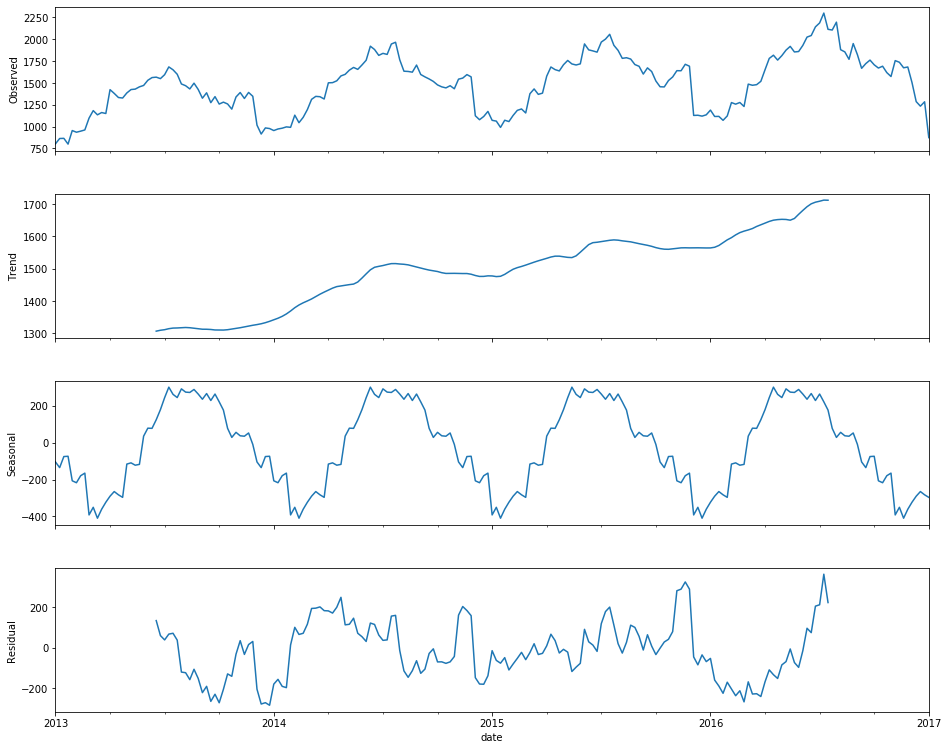

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [5]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

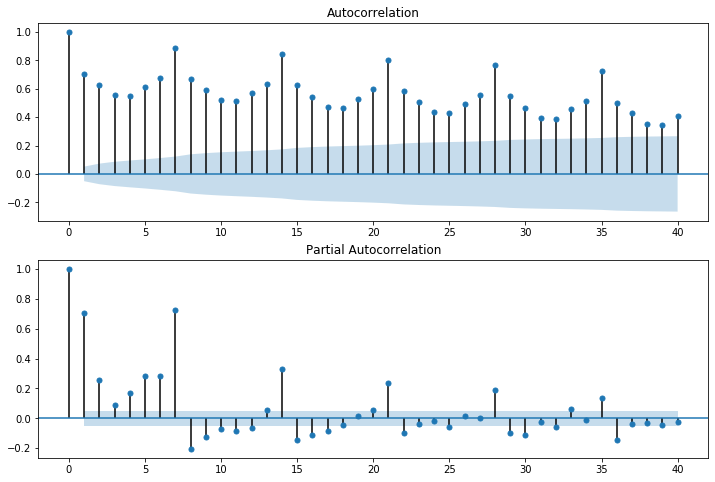

In [6]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

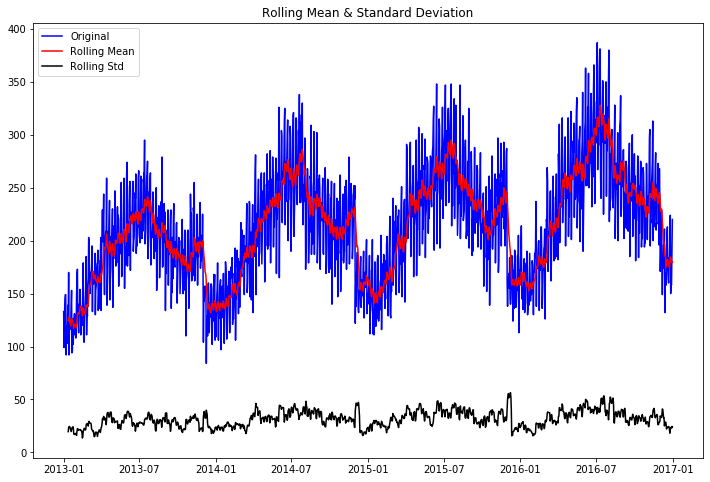

Results of Dickey-Fuller Test:
p-value = 0.1230. The series is likely non-stationary.
Test Statistic                   -2.469827
p-value                           0.122989
#Lags Used                       20.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [7]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [8]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

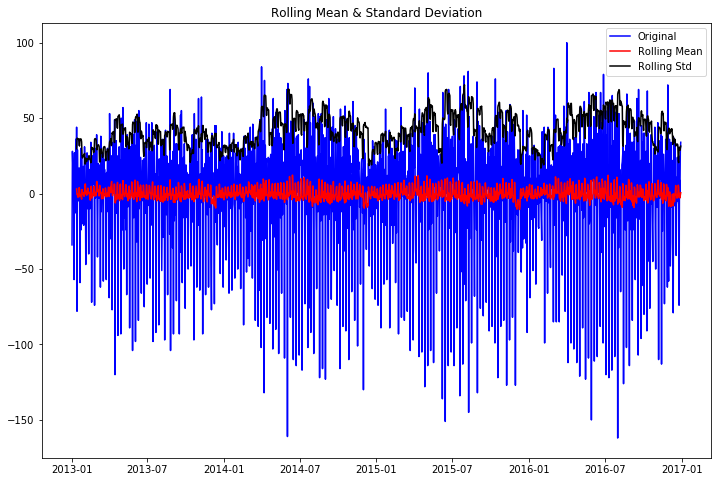

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.024773e+01
p-value                        4.570624e-18
#Lags Used                     2.000000e+01
Number of Observations Used    1.438000e+03
Critical Value (1%)           -3.434906e+00
Critical Value (5%)           -2.863552e+00
Critical Value (10%)          -2.567841e+00
dtype: float64


In [9]:
test_stationarity(first_diff, window = 12)

In [10]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02  -34.0
1    2013-01-03   28.0
2    2013-01-04   18.0
3    2013-01-05    4.0
4    2013-01-06    0.0
5    2013-01-07  -57.0
6    2013-01-08   27.0
7    2013-01-09   -5.0
8    2013-01-10  -11.0
9    2013-01-11   36.0
10   2013-01-12  -13.0
11   2013-01-13   44.0
12   2013-01-14  -78.0
13   2013-01-15   29.0
14   2013-01-16   -5.0
15   2013-01-17    6.0
16   2013-01-18    0.0
17   2013-01-19   17.0
18   2013-01-20   14.0
19   2013-01-21  -59.0
20   2013-01-22    2.0
21   2013-01-23   30.0
22   2013-01-24  -24.0
23   2013-01-25   24.0
24   2013-01-26   -2.0
25   2013-01-27    7.0
26   2013-01-28  -20.0
27   2013-01-29   18.0
28   2013-01-30  -21.0
29   2013-01-31    9.0
...         ...    ...
1429 2016-12-01  -58.0
1430 2016-12-02   16.0
1431 2016-12-03   36.0
1432 2016-12-04    6.0
1433 2016-12-05  -48.0
1434 2016-12-06  -32.0
1435 2016-12-07   34.0
1436 2016-12-08   -9.0
1437 2016-12-09   22.0
1438 2016-12-10   -

# Step 4: Plot ACF and PACF plots

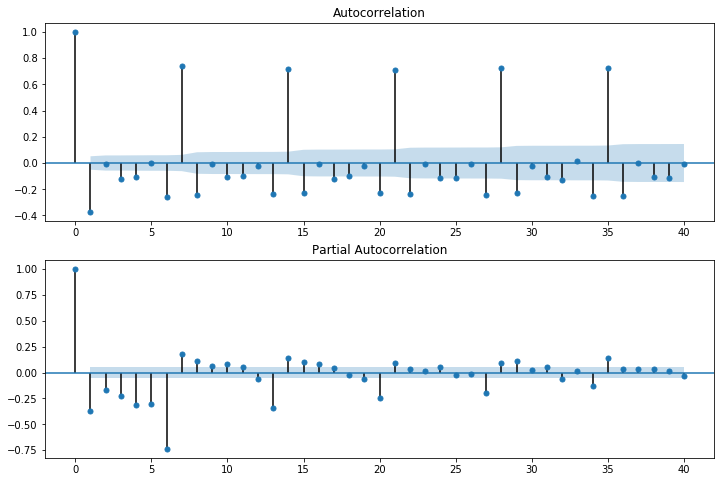

In [11]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6: Fit the model

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


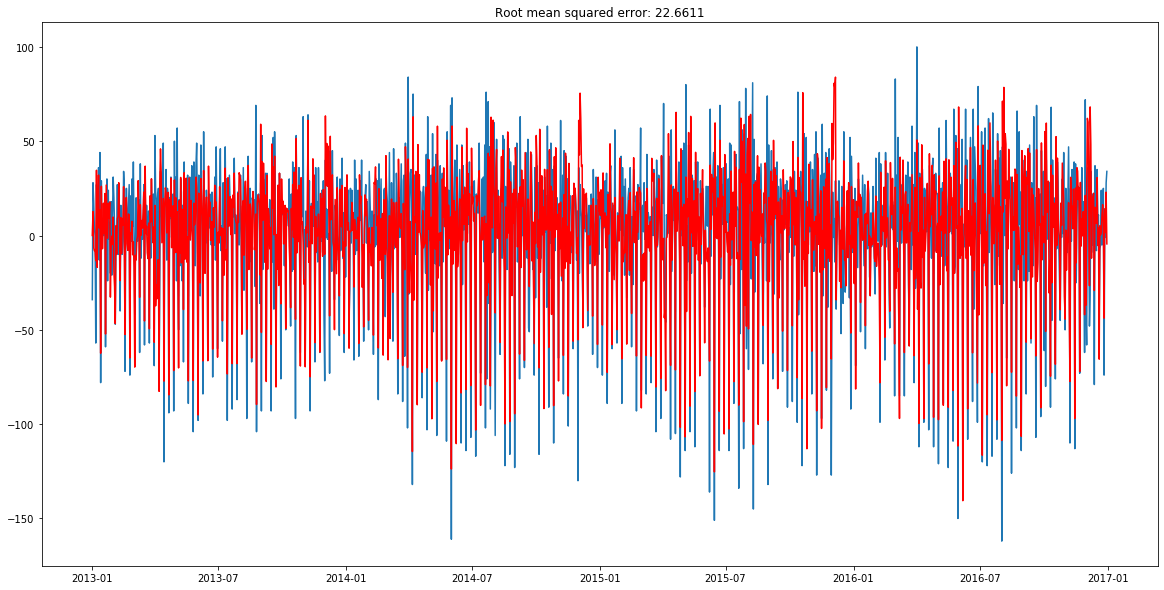

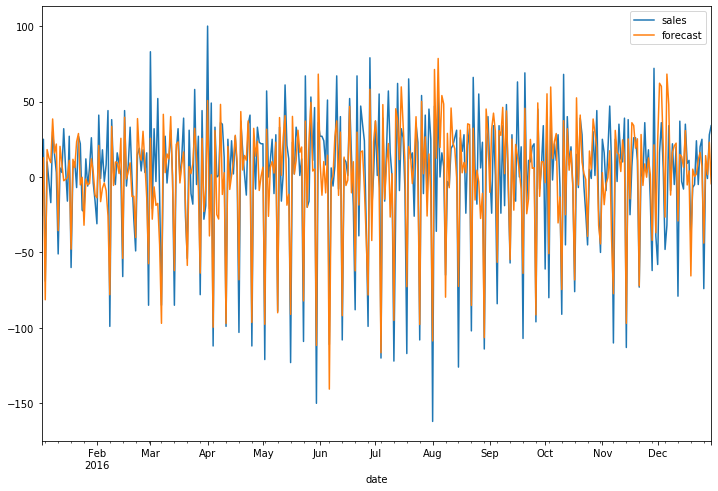

In [12]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

# Step 7: Test the model

# i. Testing the fitted values in original scale

## i. a) converting fitted values to original scale

In [13]:
#Let "xd" denote the differenced data and "x" denote the original data. 
#Then xd[n]=x[n+1]-x[n]. Therefore, x[n+1]=x[n]+xd[n]. 
#If you add the first element of first difference forecast to the real data with the same indice, then you will get the next real data forecast.
#here used xd[n] = x[n] -x[n+1] so first becomes nan
fittedOrgScale= df.copy()#data frame has values in sales
xd= results_ARIMA.fittedvalues# series has values in values
print(type(results_ARIMA.fittedvalues))

xd=pd.concat([pd.Series([0]),xd])
end=fittedOrgScale.shape[0]#for for loop in next cell
print(fittedOrgScale.values)


<class 'pandas.core.series.Series'>
[[133]
 [ 99]
 [127]
 ...
 [158]
 [186]
 [220]]


In [14]:
print(fittedOrgScale.values[0])
#run above to run this 
j=0
for i in fittedOrgScale.index:
    
    fittedOrgScale.values[j] = fittedOrgScale.values[j+1] + xd.values[j]
    print('adding',j,fittedOrgScale.values[j+1],'+',xd.values[j],fittedOrgScale.values[j])
    j+=1
    if j+1 ==end:
        break



[133]
adding 0 [99] + 0.0 [99]
adding 1 [127] + 0.04007601251081638 [127]
adding 2 [145] + 12.673842329135462 [157]
adding 3 [149] + -6.481059835371486 [142]
adding 4 [149] + -8.021584558774897 [140]
adding 5 [92] + -7.83143969221298 [84]
adding 6 [119] + -13.338259308086307 [105]
adding 7 [114] + 34.613257895768065 [148]
adding 8 [103] + -16.883344888534143 [86]
adding 9 [139] + 16.12259402474726 [155]
adding 10 [126] + 32.05220041880583 [158]
adding 11 [170] + 3.961981820814021 [173]
adding 12 [92] + 13.635293687545477 [105]
adding 13 [121] + -62.38069543412551 [58]
adding 14 [116] + 26.114098735239544 [142]
adding 15 [122] + -7.049012832110866 [114]
adding 16 [122] + -6.801722871371378 [115]
adding 17 [139] + 17.10087189694115 [156]
adding 18 [153] + 1.0618435162710256 [154]
adding 19 [94] + 22.251458707021257 [116]
adding 20 [96] + -52.20958111292223 [43]
adding 21 [126] + 26.764243915030004 [152]
adding 22 [102] + 13.266623724320592 [115]
adding 23 [126] + -1.4378017039662225 [124

adding 192 [265] + 35.76599617073924 [300]
adding 193 [295] + -13.022913491614535 [281]
adding 194 [197] + -7.439104679791392 [189]
adding 195 [201] + -73.37645027143141 [127]
adding 196 [211] + 30.646298185463966 [241]
adding 197 [243] + 4.852718340874727 [247]
adding 198 [260] + 10.585564810783374 [270]
adding 199 [262] + 20.60463186602707 [282]
adding 200 [275] + 0.4970052600858803 [275]
adding 201 [183] + 19.326689877514088 [202]
adding 202 [195] + -67.91008978455163 [127]
adding 203 [205] + 21.399375060208254 [226]
adding 204 [246] + 15.195446552902567 [261]
adding 205 [247] + 33.1060232128086 [280]
adding 206 [258] + 10.583397120558399 [268]
adding 207 [264] + 7.963717456857871 [271]
adding 208 [177] + 6.1083216544283765 [183]
adding 209 [200] + -67.86701982056583 [132]
adding 210 [208] + 22.245993497958047 [230]
adding 211 [203] + 6.9131393231962175 [209]
adding 212 [214] + 33.28180135310063 [247]
adding 213 [246] + 31.964677796344795 [277]
adding 214 [239] + 29.547856955588834 

adding 512 [244] + -10.210279322579897 [233]
adding 513 [264] + 16.0506146517062 [280]
adding 514 [257] + 1.5746637445562968 [258]
adding 515 [326] + -1.6343116821447286 [324]
adding 516 [165] + 9.86698514042832 [174]
adding 517 [238] + -123.79163626236826 [114]
adding 518 [245] + 58.06100508586054 [303]
adding 519 [243] + -15.222054650820425 [227]
adding 520 [264] + 5.3862102370584 [269]
adding 521 [304] + 18.576199104391282 [322]
adding 522 [299] + -7.8662138174778065 [291]
adding 523 [217] + 12.837282263059201 [229]
adding 524 [265] + -110.33231979067283 [154]
adding 525 [263] + 30.978439446284547 [293]
adding 526 [260] + -16.521524714212966 [243]
adding 527 [277] + -9.849582915721781 [267]
adding 528 [312] + 8.217020067820918 [320]
adding 529 [325] + 19.423677560581716 [344]
adding 530 [215] + -16.47378433163328 [198]
adding 531 [263] + -83.47171001143238 [179]
adding 532 [237] + 46.90241528481014 [283]
adding 533 [274] + -2.713347951012178 [271]
adding 534 [277] + 21.4607440904273

adding 838 [166] + 18.626890331788545 [184]
adding 839 [213] + -71.24081076403311 [141]
adding 840 [216] + 65.3014622535166 [281]
adding 841 [223] + 2.200203271616809 [225]
adding 842 [242] + 10.254558301052237 [252]
adding 843 [281] + 22.86339283102957 [303]
adding 844 [295] + 8.025172394924297 [303]
adding 845 [167] + -13.610900823731491 [153]
adding 846 [210] + -101.71875029990174 [108]
adding 847 [210] + 45.98510824745362 [255]
adding 848 [255] + 3.182713373385653 [258]
adding 849 [258] + 14.964537726686611 [272]
adding 850 [307] + -5.401997692960482 [301]
adding 851 [300] + 16.58044959551802 [316]
adding 852 [186] + -18.41936636675301 [167]
adding 853 [266] + -106.72901097237072 [159]
adding 854 [242] + 31.00565466374946 [273]
adding 855 [247] + -40.28157214106178 [206]
adding 856 [233] + 19.361532465624165 [252]
adding 857 [281] + 10.077250990030713 [291]
adding 858 [301] + 54.600978880332704 [355]
adding 859 [197] + 4.072256810570861 [201]
adding 860 [231] + -90.46426692989681 [

adding 1195 [217] + 2.858974985974882 [219]
adding 1196 [242] + -97.07245272975324 [144]
adding 1197 [239] + 20.245060783667196 [259]
adding 1198 [263] + -8.242240451388058 [254]
adding 1199 [265] + 1.0202320061232086 [266]
adding 1200 [292] + 10.239864002933938 [302]
adding 1201 [298] + 27.647265493432187 [325]
adding 1202 [195] + 10.025445842673163 [205]
adding 1203 [232] + -68.10290862249752 [163]
adding 1204 [250] + 43.345090306194244 [293]
adding 1205 [252] + 4.644708063868688 [256]
adding 1206 [240] + 14.235369971556965 [254]
adding 1207 [275] + 11.101652767466867 [286]
adding 1208 [316] + 37.1751392312293 [353]
adding 1209 [204] + 8.620201839763936 [212]
adding 1210 [230] + -96.3647512648713 [133]
adding 1211 [222] + 32.23308322995559 [254]
adding 1212 [255] + 13.864703961775827 [268]
adding 1213 [278] + 23.62449888220155 [301]
adding 1214 [300] + -8.919954641367784 [291]
adding 1215 [322] + 0.38160753325255925 [322]
adding 1216 [201] + 6.4845630407846215 [207]
adding 1217 [258]

In [15]:
#convert to cumulative sum
#1st make data frame as series
#series bata cumsum
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print ('prediction arima diff',type(predictions_ARIMA_diff),predictions_ARIMA_diff.head())
#to cumsum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print ('cumsum',predictions_ARIMA_diff_cumsum.head())



prediction arima diff <class 'pandas.core.series.Series'> date
2013-01-02     0.040076
2013-01-03    12.673842
2013-01-04    -6.481060
2013-01-05    -8.021585
2013-01-06    -7.831440
dtype: float64
cumsum date
2013-01-02     0.040076
2013-01-03    12.713918
2013-01-04     6.232859
2013-01-05    -1.788726
2013-01-06    -9.620166
dtype: float64


In [16]:
# df1= df.drop(df.index[0])
#dropping first value of original as fitted is from second index
df1=df.drop(df.index[0])
x1=fittedOrgScale.copy()
len(x1)


1460

# rmse of the fitted line for training data

In [17]:
error = df.sales - fittedOrgScale.values.reshape(fittedOrgScale.values.shape[0])
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE = meanError**0.5
highestScale = np.amax(dffiltered.values)
print('The Root Mean Squared Error is',RMSE,'The range of data is 0 to ',highestScale)

The Root Mean Squared Error is 49.35650295109697 The range of data is 0 to  387


### i.b) plot original vs fitted values in original scale

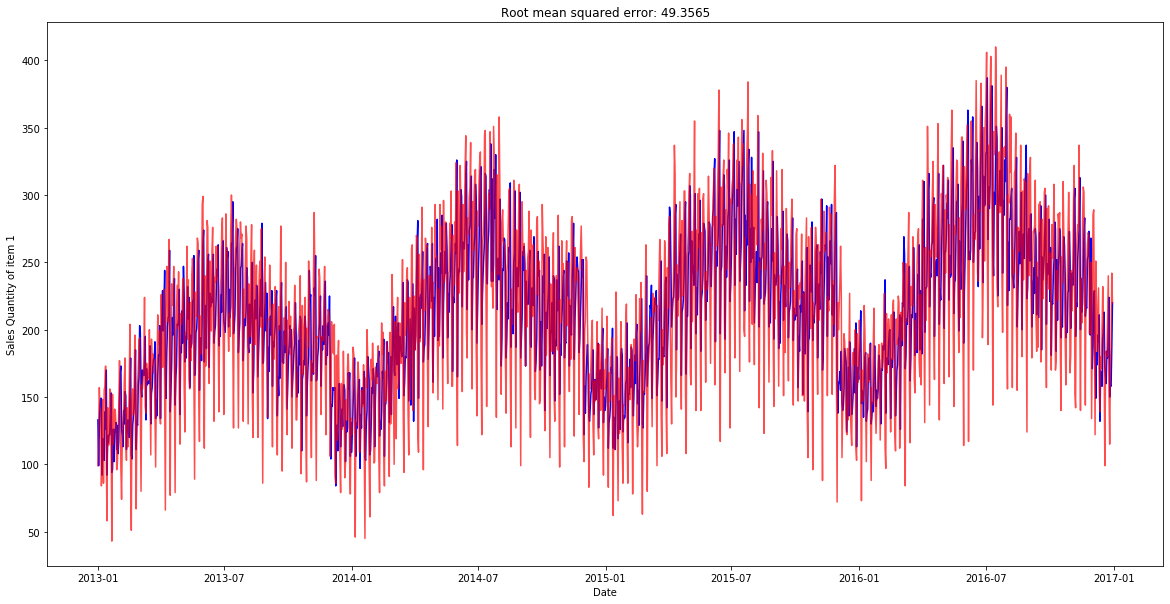

1460 1460


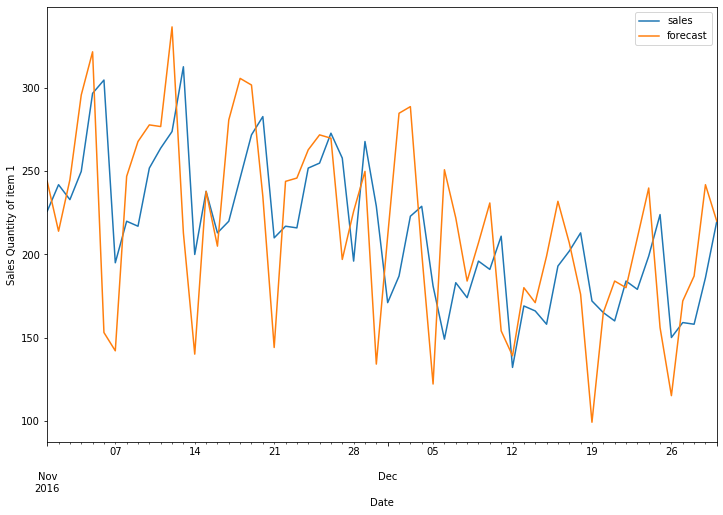

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df.sales,color='blue')
plt.plot(x1,'r-', alpha=0.7)
plt.title('Root mean squared error: %.4f'% RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()
print(len(df),len(x1))
df['forecast'] = x1.values
start_index =1400
end_index =start_index+365

df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

## ii. Testing the predicted values

In [19]:
fitLen = len(results_ARIMA.fittedvalues)

lastTwo= len(results_ARIMA.fittedvalues)-2*365

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


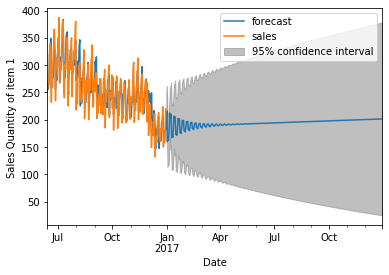

In [20]:
results_ARIMA.plot_predict(fitLen-200,fitLen+365)#start rows + end rows of forecast rows 18260+40
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2016-12-31    205.460142
2017-01-01    215.972248
2017-01-02    159.661324
2017-01-03    165.518862
2017-01-04    163.144905
Freq: D, dtype: float64


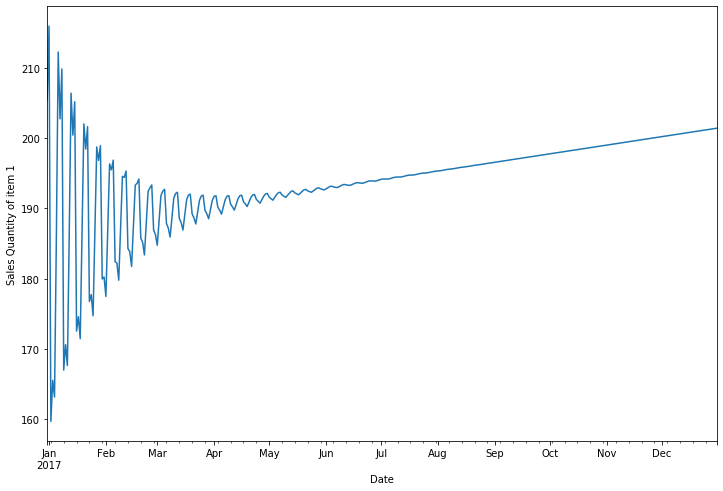

In [21]:
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='levels', dynamic=False) # this works
print(yearPrediction.head())

yearPrediction.plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

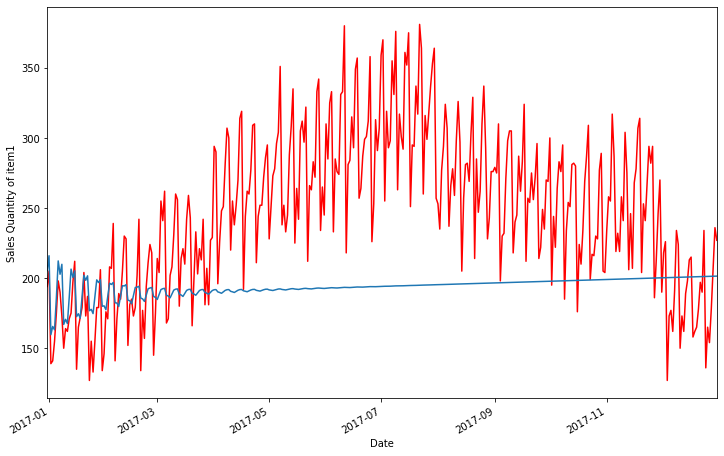

In [22]:
plt.plot(test.sales,color='red',)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item"+str(itemno))
yearPrediction.plot(figsize=(12, 8))
plt.show()

In [23]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2016-12-31    167.460142
2017-01-01    199.512107
2017-01-02    157.689076
2017-01-03    150.857538
2017-01-04    152.626043
2017-01-05    174.839938
2017-01-06    161.287375
2017-01-07    155.491860
2017-01-08    187.093613
2017-01-09    140.119228
2017-01-10    135.617163
2017-01-11    135.020235
2017-01-12    159.487405
2017-01-13    193.325145
2017-01-14    173.009065
2017-01-15    167.758760
2017-01-16    157.328715
2017-01-17    132.050722
2017-01-18    132.873604
2017-01-19    160.865656
2017-01-20    154.720877
2017-01-21    162.431786
2017-01-22    191.173096
2017-01-23    141.098009
2017-01-24    143.981210
2017-01-25    151.988256
2017-01-26    160.885016
2017-01-27    167.167184
2017-01-28    179.070672
2017-01-29    179.103341
                 ...    
2017-12-02    187.040398
2017-12-03    223.040293
2017-12-04    229.040069
2017-12-05    181.039856
2017-12-06    149.039803
2017-12-07    183.039981
2017-12-08    174.040175
2017-12-09    196.040328
2017-12-10    191.040252


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [24]:
#out sample 
error = orgscale.values-test.values.reshape(test.values.shape[0])
highestScale = np.amax(test.values)
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE2 = meanError**0.5
print(RMSE2,meanAbsoluteError,highestScale)


44.65483097474671 34.51960306147414 381


The root mean squared error is  49.35650295109697


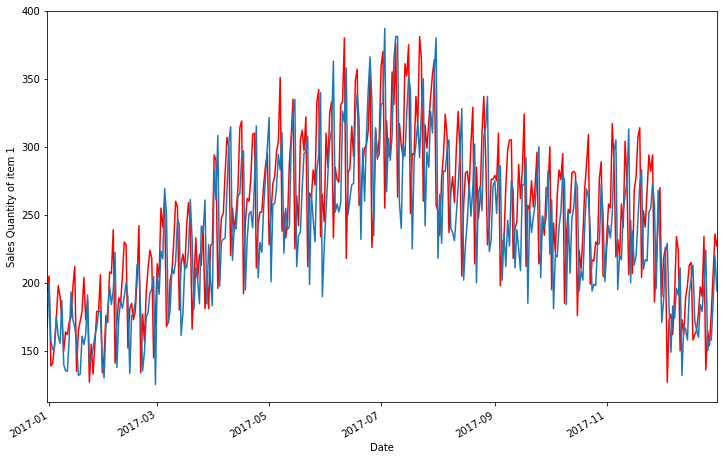

In [25]:
print("The root mean squared error is ",RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.plot(test.sales,color='red',)
orgscale.plot(figsize=(12, 8))
plt.show()

In [26]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [27]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  13265.62973237289


# Using full dataset with parameters

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object

dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
df=dffiltered
print(df.head())
print(df.values[2])

        date  item  sales
0 2013-01-01     1     13
1 2013-01-02     1     11
2 2013-01-03     1     14
3 2013-01-04     1     13
4 2013-01-05     1     10
            item  sales
date                   
2013-01-01    10    133
2013-01-02    10     99
2013-01-03    10    127
2013-01-04    10    145
2013-01-05    10    149
            sales
date             
2013-01-01    133
2013-01-02     99
2013-01-03    127
2013-01-04    145
2013-01-05    149
[127]


# ii. analysis

In [29]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06    802
2013-01-13    863
2013-01-20    865
2013-01-27    799
2013-02-03    954
            sales
date             
2013-01-31   3794
2013-02-28   3863
2013-03-31   5190
2013-04-30   5783
2013-05-31   6298
            sales
date             
2017-12-27    154
2017-12-28    178
2017-12-29    207
2017-12-30    236
2017-12-31    227


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

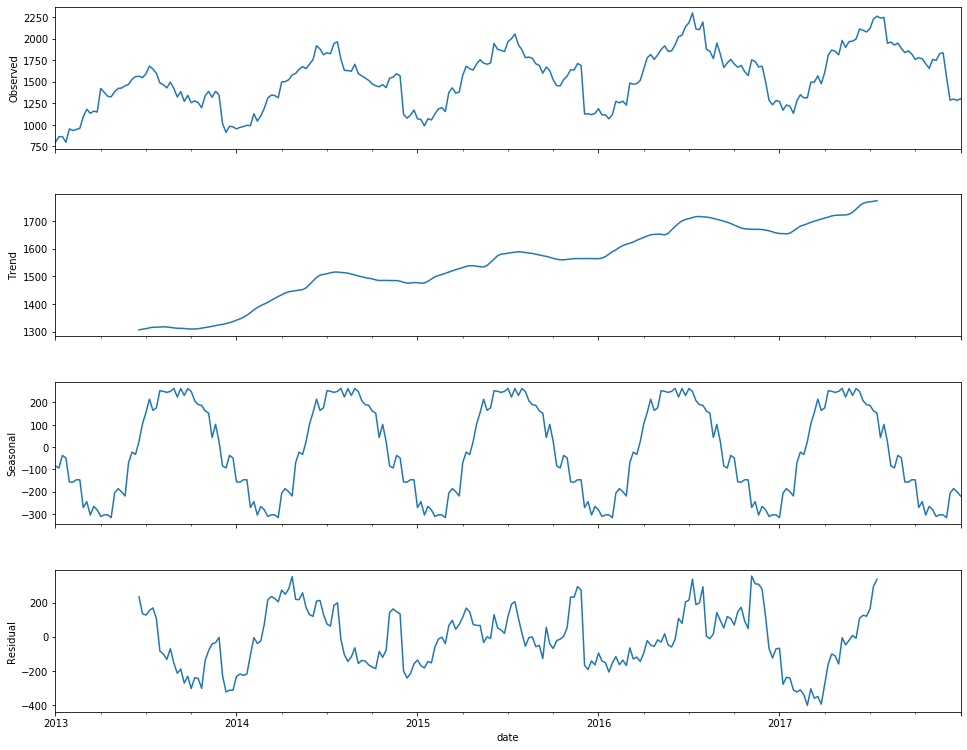

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [32]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

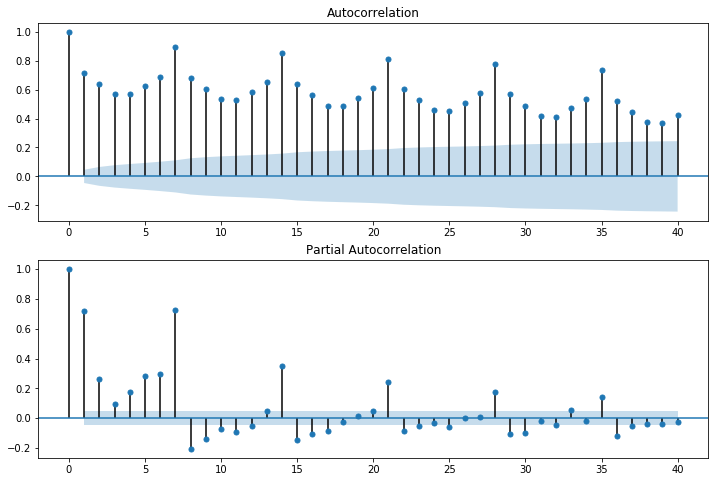

In [33]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

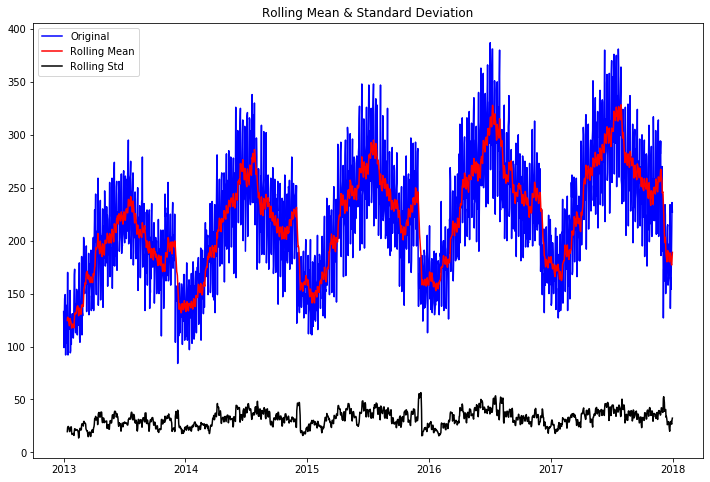

Results of Dickey-Fuller Test:
p-value = 0.0916. The series is likely non-stationary.
Test Statistic                   -2.606901
p-value                           0.091579
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [34]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [35]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

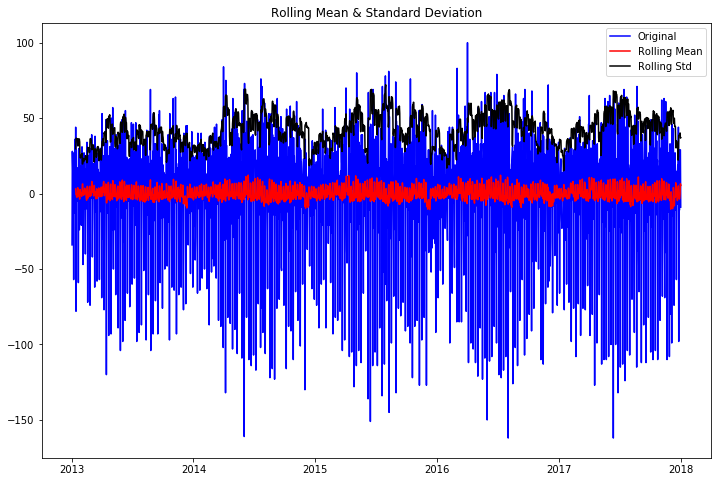

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.174400e+01
p-value                        1.254052e-21
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [36]:
test_stationarity(first_diff, window = 12)

In [37]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02  -34.0
1    2013-01-03   28.0
2    2013-01-04   18.0
3    2013-01-05    4.0
4    2013-01-06    0.0
5    2013-01-07  -57.0
6    2013-01-08   27.0
7    2013-01-09   -5.0
8    2013-01-10  -11.0
9    2013-01-11   36.0
10   2013-01-12  -13.0
11   2013-01-13   44.0
12   2013-01-14  -78.0
13   2013-01-15   29.0
14   2013-01-16   -5.0
15   2013-01-17    6.0
16   2013-01-18    0.0
17   2013-01-19   17.0
18   2013-01-20   14.0
19   2013-01-21  -59.0
20   2013-01-22    2.0
21   2013-01-23   30.0
22   2013-01-24  -24.0
23   2013-01-25   24.0
24   2013-01-26   -2.0
25   2013-01-27    7.0
26   2013-01-28  -20.0
27   2013-01-29   18.0
28   2013-01-30  -21.0
29   2013-01-31    9.0
...         ...    ...
1795 2017-12-02   28.0
1796 2017-12-03    8.0
1797 2017-12-04  -99.0
1798 2017-12-05   46.0
1799 2017-12-06    4.0
1800 2017-12-07  -15.0
1801 2017-12-08   29.0
1802 2017-12-09   43.0
1803 2017-12-10  -10.0
1804 2017-12-11  -7

# Step 4: Plot ACF and PACF plots

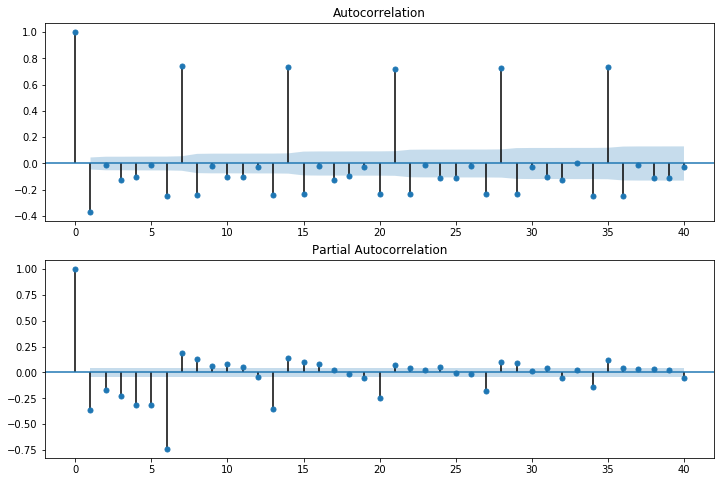

In [38]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6 : Fit the model

c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


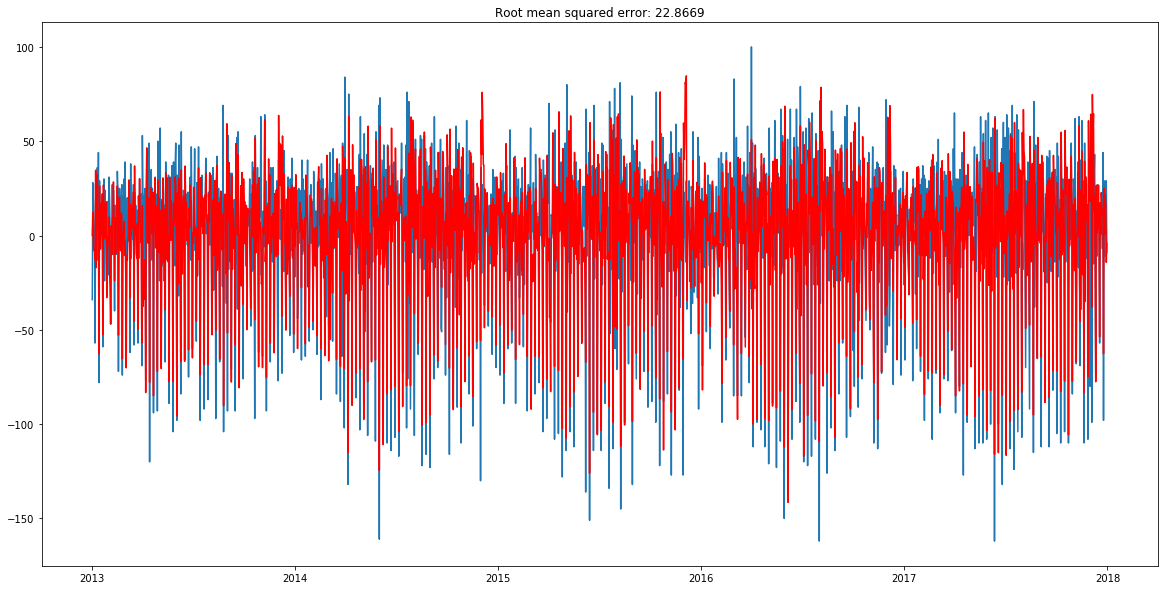

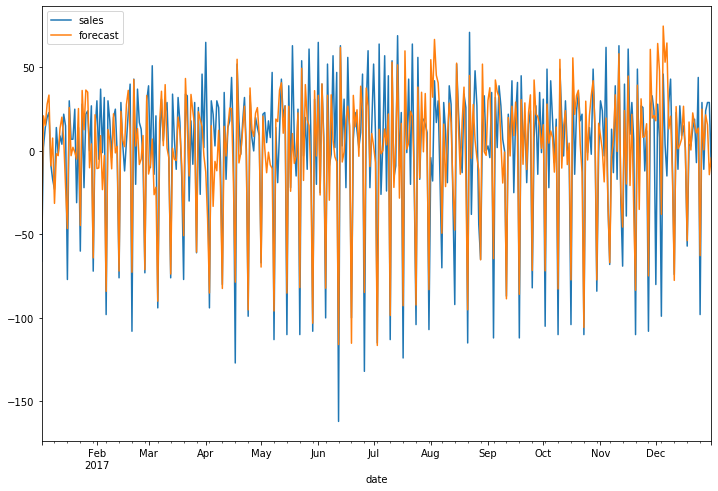

In [47]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

In [48]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2017-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2017-12-31    189.784421
2018-01-01    128.966684
2018-01-02    157.630204
2018-01-03    130.126324
2018-01-04    176.863139
2018-01-05    198.090226
2018-01-06    220.090497
2018-01-07    182.789581
2018-01-08    116.903103
2018-01-09    160.951083
2018-01-10    153.998119
2018-01-11    181.086818
2018-01-12    189.357592
2018-01-13    192.089732
2018-01-14    191.270217
2018-01-15    170.454751
2018-01-16    140.916086
2018-01-17    156.183630
2018-01-18    188.186694
2018-01-19    193.585707
2018-01-20    217.397692
2018-01-21    168.483362
2018-01-22    156.123697
2018-01-23    129.684189
2018-01-24    147.439654
2018-01-25    146.441412
2018-01-26    166.588356
2018-01-27    189.618691
2018-01-28    175.468839
2018-01-29    182.979281
                 ...    
2018-12-02    218.033536
2018-12-03    226.033128
2018-12-04    127.032659
2018-12-05    173.032540
2018-12-06    177.032800
2018-12-07    162.033225
2018-12-08    191.033533
2018-12-09    234.033449
2018-12-10    224.033129


c:\users\acer\desktop\current\minor\arimafinal\.arimaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


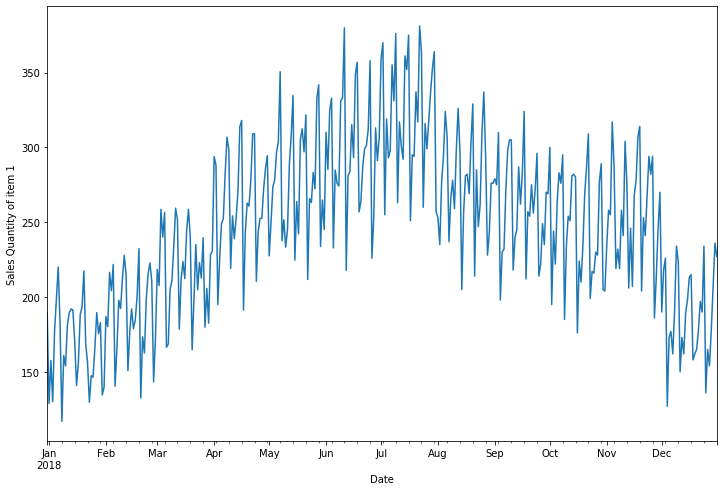

In [50]:
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
orgscale.plot(figsize=(12, 8))
plt.show()

In [51]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [53]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  16621.731417355844


# EXPORTING AS JSON

In [54]:
dft= pd.DataFrame({'date':orgscale.index, 'sales quantity':orgscale.values})

dft['date'] = pd.to_datetime(dft['date'])#convert to date time object
dft['item'] = itemno
print(dft.tail())

          date  sales quantity  item
361 2018-12-27      154.032910     1
362 2018-12-28      178.033124     1
363 2018-12-29      207.033290     1
364 2018-12-30      236.033270     1
365 2018-12-31      227.033118     1


In [55]:
export=dft.to_json(orient='records',date_format='iso')

In [57]:
print(export)
dft.to_json(path_or_buf=r'C:\Users\Acer\Desktop\current\minor\arimaFinal\predicted{}.json'.format(itemno),orient='records',date_format='iso')

[{"date":"2017-12-31T00:00:00.000Z","sales quantity":189.7844208743,"item":1},{"date":"2018-01-01T00:00:00.000Z","sales quantity":128.9666843758,"item":1},{"date":"2018-01-02T00:00:00.000Z","sales quantity":157.6302041729,"item":1},{"date":"2018-01-03T00:00:00.000Z","sales quantity":130.1263243968,"item":1},{"date":"2018-01-04T00:00:00.000Z","sales quantity":176.8631394049,"item":1},{"date":"2018-01-05T00:00:00.000Z","sales quantity":198.0902258066,"item":1},{"date":"2018-01-06T00:00:00.000Z","sales quantity":220.0904966564,"item":1},{"date":"2018-01-07T00:00:00.000Z","sales quantity":182.7895814416,"item":1},{"date":"2018-01-08T00:00:00.000Z","sales quantity":116.9031029231,"item":1},{"date":"2018-01-09T00:00:00.000Z","sales quantity":160.9510828431,"item":1},{"date":"2018-01-10T00:00:00.000Z","sales quantity":153.998119253,"item":1},{"date":"2018-01-11T00:00:00.000Z","sales quantity":181.0868183887,"item":1},{"date":"2018-01-12T00:00:00.000Z","sales quantity":189.3575920362,"item":1}